In [ ]:
from tqdm import tqdm
import scipy.stats as sts
import scipy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.special as sp

In [ ]:
## Задача 1
from mpmath import mp
mp.dps = 1001
num1 = mp.pi
num2 = num1 - np.floor(num1)
num2 *= 10
digits = [0,1,2,3,4,5,6,7,8,9]
hypothesis = [100 for i in range(10)]
counters = np.zeros(10)
for i in range (1000):
    counters[int(np.floor(num2))] +=1
    num1 = num2
    num2 = num1 - np.floor(num1)
    num2 *= 10
print(counters)
chisq, pvalue = sts.chisquare(f_obs=counters, f_exp=hypothesis)

degrees_of_freedom = 9
critical_value = sts.chi2.ppf(0.95, df=degrees_of_freedom)



print("Результаты теста хи-квадрат:")
print("Хи-квадрат статистика:", chisq)
print("Количество степеней свободы:", degrees_of_freedom)
print("Критическое значение для уровня значимости 0.05:", critical_value)
print("Можно ли считать цифры числа π после запятой случайными равномерными при уровне значимости 0.05:", chisq < critical_value)
print(pvalue)

[ 93. 116. 103. 102.  93.  97.  94.  95. 101. 106.]
Результаты теста хи-квадрат:
Хи-квадрат статистика: 4.739999999999999
Количество степеней свободы: 9
Критическое значение для уровня значимости 0.05: 16.918977604620448
Можно ли считать цифры числа π после запятой случайными равномерными при уровне значимости 0.05: True
0.8563586575252496


In [3]:
## Задача 2
import pandas as pd
from scipy.stats import chisquare
import numpy as np

data = pd.read_csv('Priem (2) - Priem (2).csv').head()
print(data)

df = pd.read_csv('Priem (2) - Priem (2).csv')

cut_bins = [0, 70, 80, 90, 100]
cut_bins_sum = [0, 140, 160, 180, 200]
df['Sum'] = df['ЕГЭ...рус.яз.'] + df['ЕГЭ...матем.']

df1 = df[df['Пол'] == 'ЖЕНСКИЙ']
df2 = df[df['Пол'] == 'МУЖСКОЙ']


count_female_rus = df1.groupby(pd.cut(df1['ЕГЭ...рус.яз.'],bins=cut_bins))['ЕГЭ...рус.яз.'].count().to_numpy()
count_female_math = df1.groupby(pd.cut(df1['ЕГЭ...матем.'],bins=cut_bins))['ЕГЭ...матем.'].count().to_numpy()
count_female_avg = df1.groupby(pd.cut(df1['Sum'], bins=cut_bins_sum))['Sum'].count().to_numpy()

count_male_rus = df2.groupby(pd.cut(df2['ЕГЭ...рус.яз.'],bins=cut_bins))['ЕГЭ...рус.яз.'].count().to_numpy()
count_male_math = df2.groupby(pd.cut(df2['ЕГЭ...матем.'],bins=cut_bins))['ЕГЭ...матем.'].count().to_numpy()
count_male_avg = df2.groupby(pd.cut(df2['Sum'], bins=cut_bins_sum))['Sum'].count().to_numpy()


size1 = np.sum(count_male_rus)
size2 = np.sum(count_female_rus)

table = np.array([count_female_rus, count_male_rus])
# chisq, pvalue = sts.chisquare(f_obs=count_female_rus, f_exp=count_male_rus * size2/size1)
chisq = sts.chi2_contingency(table).statistic
pvalue = sts.chi2_contingency(table).pvalue
print(f"p-value: {pvalue}")



degrees_of_freedom = 3
critical_value = sts.chi2.ppf(0.95, df=degrees_of_freedom)
homogeneity = chisq < critical_value

print("Результаты теста хи-квадрат для русского языка:")
print("Хи-квадрат статистика:", chisq)
print("Количество степеней свободы:", degrees_of_freedom)
print("Критическое значение для уровня значимости 0.05:", critical_value)
print("Можно ли считать однородными результаты по русскому языку:", homogeneity)

for i in range(3):
  print("")

size3 = np.sum(count_male_math)
size4 = np.sum(count_female_math)

table = np.array([count_female_math, count_male_math])
# chisq2, pvalue = sts.chisquare(f_obs=count_female_math, f_exp=count_male_math * size4/size3)
chisq2 = sts.chi2_contingency(table).statistic
pvalue = sts.chi2_contingency(table).pvalue
print(f"p-value: {pvalue}")
homogeneity2 = chisq2 < critical_value
print("Результаты теста хи-квадрат для математики:")
print("Хи-квадрат статистика:", chisq2)
print("Количество степеней свободы:", degrees_of_freedom)
print("Критическое значение для уровня значимости 0.05:", critical_value)
print("Можно ли считать однородными результаты по математике:", homogeneity2)

for i in range(3):
  print("")

size5 = np.sum(count_male_avg)
size6 = np.sum(count_female_avg)

table = np.array([count_female_avg, count_male_avg])
# chisq3, pvalue = sts.chisquare(f_obs=count_female_avg, f_exp=count_male_avg * size6/size5)
chisq3 = sts.chi2_contingency(table).statistic
pvalue = sts.chi2_contingency(table).pvalue
print(f"p-value: {pvalue}")
homogeneity3 = chisq3 < critical_value
print("Результаты теста хи-квадрат для суммарных баллов:")
print("Хи-квадрат статистика:", chisq3)
print("Количество степеней свободы:", degrees_of_freedom)
print("Критическое значение для уровня значимости 0.05:", critical_value)
print("Можно ли считать однородными суммарные результаты:", homogeneity3)

for i in range(3):
  print("")

df_test_1 = df.groupby(pd.cut(df['ЕГЭ...рус.яз.'],bins=cut_bins))['ЕГЭ...рус.яз.'].count().to_numpy()
df_test_2 = df.groupby(pd.cut(df['ЕГЭ...матем.'],bins=cut_bins))['ЕГЭ...матем.'].count().to_numpy()

table = np.array([df_test_1, df_test_2])
res = sts.chi2_contingency(table).statistic
pvalue = sts.chi2_contingency(table).pvalue
print(f"p-value: {pvalue}")
test = res < critical_value
print("Результаты теста хи-квадрат для независимости:")
print("Хи-квадрат статистика:", res)
print("Количество степеней свободы:", degrees_of_freedom)
print("Критическое значение для уровня значимости 0.05:", critical_value)
print("Можно ли считать результаты независимыми:", test)

       Пол  Сумма.баллов  ЕГЭ...матем.  ЕГЭ...рус.яз.  \
0  МУЖСКОЙ           388          90.0           98.0   
1  ЖЕНСКИЙ           351          84.0           87.0   
2  ЖЕНСКИЙ           355          94.0           91.0   
3  ЖЕНСКИЙ           338          76.0           88.0   
4  МУЖСКОЙ           349          82.0           93.0   

   Аттестат.с.отличием.оценка  ГТО.оценка  Сочинение.оценка  \
0                           5           0                 1   
1                           0           0                 2   
2                           5           0                 2   
3                           5           0                 2   
4                           5           0                 2   

              Регион            Тип.насел..пункта Дата.рождения  \
0  Красноярский край                        ГОРОД    24.09.1998   
1     Чувашская Респ     ЦЕНТР СУБЪЕКТА ФЕДЕРАЦИИ    14.02.1997   
2           Москва г  ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ    25.03.2000   
3         

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8070: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


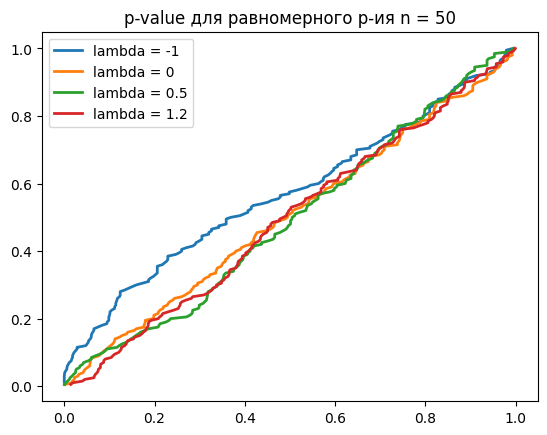

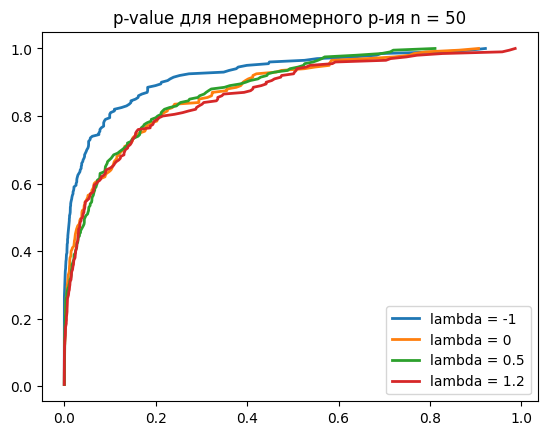

In [ ]:
## Задача 3
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import power_divergence
from scipy.stats import norm

n = 50

def uni(n:int, lambd:float):
    m = 200
    result1 = []
    for j in range (m):
        X = [1/10 for i in range(10)]
        Y = stats.multinomial.rvs(n, X)
        sample_val = stats.power_divergence(Y, lambda_ = lambd)
        result1 = np.append(result1, sample_val[1])
    result1 = np.sort(result1)
    y_vals = [(i+1)/m for i in range(m)]
    plt.title(f"p-value для равномерного р-ия n = {n}")
    ax.plot(result1, y_vals, label = f"lambda = {lambd}", lw = 2)

y_vals = [(i+1)/100 for i in range(100)]

fig,ax = plt.subplots()
for lambd in [-1,0,0.5,1.2]:
  uni(n, lambd)
plt.legend()

def nonuni(n:int, lambd:float):
    m = 200
    result1 = []
    for j in range (m):
        X = [0.1,0.05,0.15,0.2,0.1,0.05,0.15,0.1,0.1]
        Y = stats.multinomial.rvs(n, X)
        sample_val = stats.power_divergence(Y, lambda_ = lambd)
        result1 = np.append(result1, sample_val[1])
    result1 = np.sort(result1)
    y_vals = [(i+1)/m for i in range(m)]
    plt.title(f"p-value для неравномерного р-ия n = {n}")
    ax.plot(result1, y_vals, label = f"lambda = {lambd}", lw = 2)

y_vals = [(i+1)/100 for i in range(100)]

fig,ax = plt.subplots()
for lambd in [-1,0,0.5,1.2]:
  nonuni(n, lambd)
plt.legend()